In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#loading the datasets
df = pd.read_csv('car_prediction_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## EDA and Data preprocessing

In [4]:
#checking the overall information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
#0 null values
#check for duplicates
df.duplicated().sum()

2

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
#statistical summary of the data
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
df['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
brio                        10
fortuner                    10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [10]:
df.drop('Car_Name',axis=1,inplace=True)

In [11]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [15]:
df['Transmission'].value_counts()

Manual       260
Automatic     39
Name: Transmission, dtype: int64

In [13]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64

In [14]:
df['Seller_Type'].value_counts()

Dealer        193
Individual    106
Name: Seller_Type, dtype: int64

# The distributions doesn't follow a normal distribution

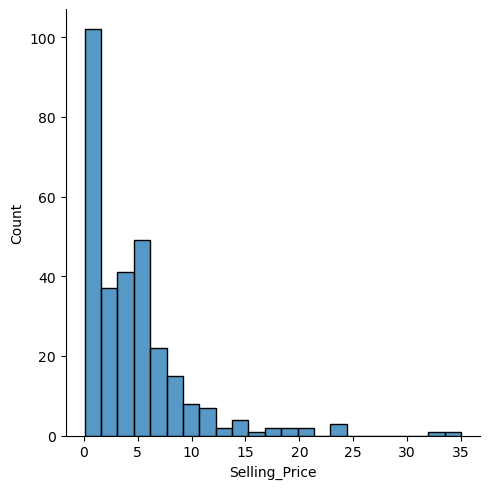

In [19]:
sns.displot(x=df['Selling_Price'])

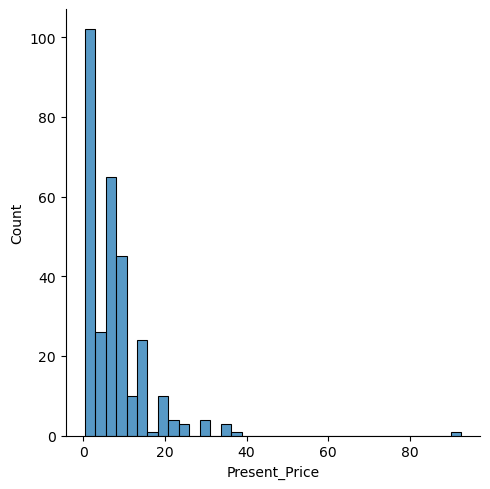

In [20]:
sns.displot(x=df['Present_Price'])

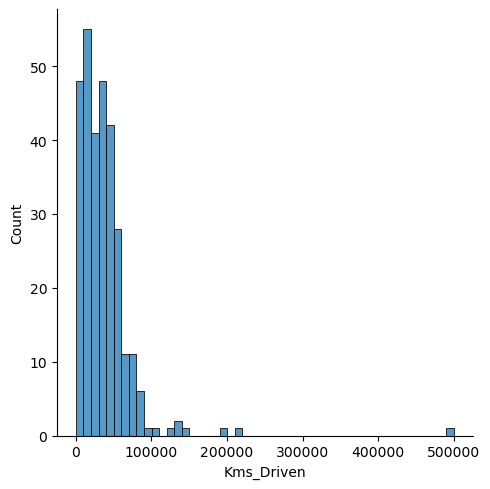

In [21]:
sns.displot(x=df['Kms_Driven'])

# Let's map the categorical features

In [24]:
df['Transmission'] = df['Transmission'].map({'Manual':1,'Automatic':0})
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol':2,'Diesel':1,'CNG':0})
df['Seller_Type'] = df['Seller_Type'].map({'Dealer':1,'Individual':0})

In [25]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,2,1,1,0
1,2013,4.75,9.54,43000,1,1,1,0
2,2017,7.25,9.85,6900,2,1,1,0
3,2011,2.85,4.15,5200,2,1,1,0
4,2014,4.60,6.87,42450,1,1,1,0


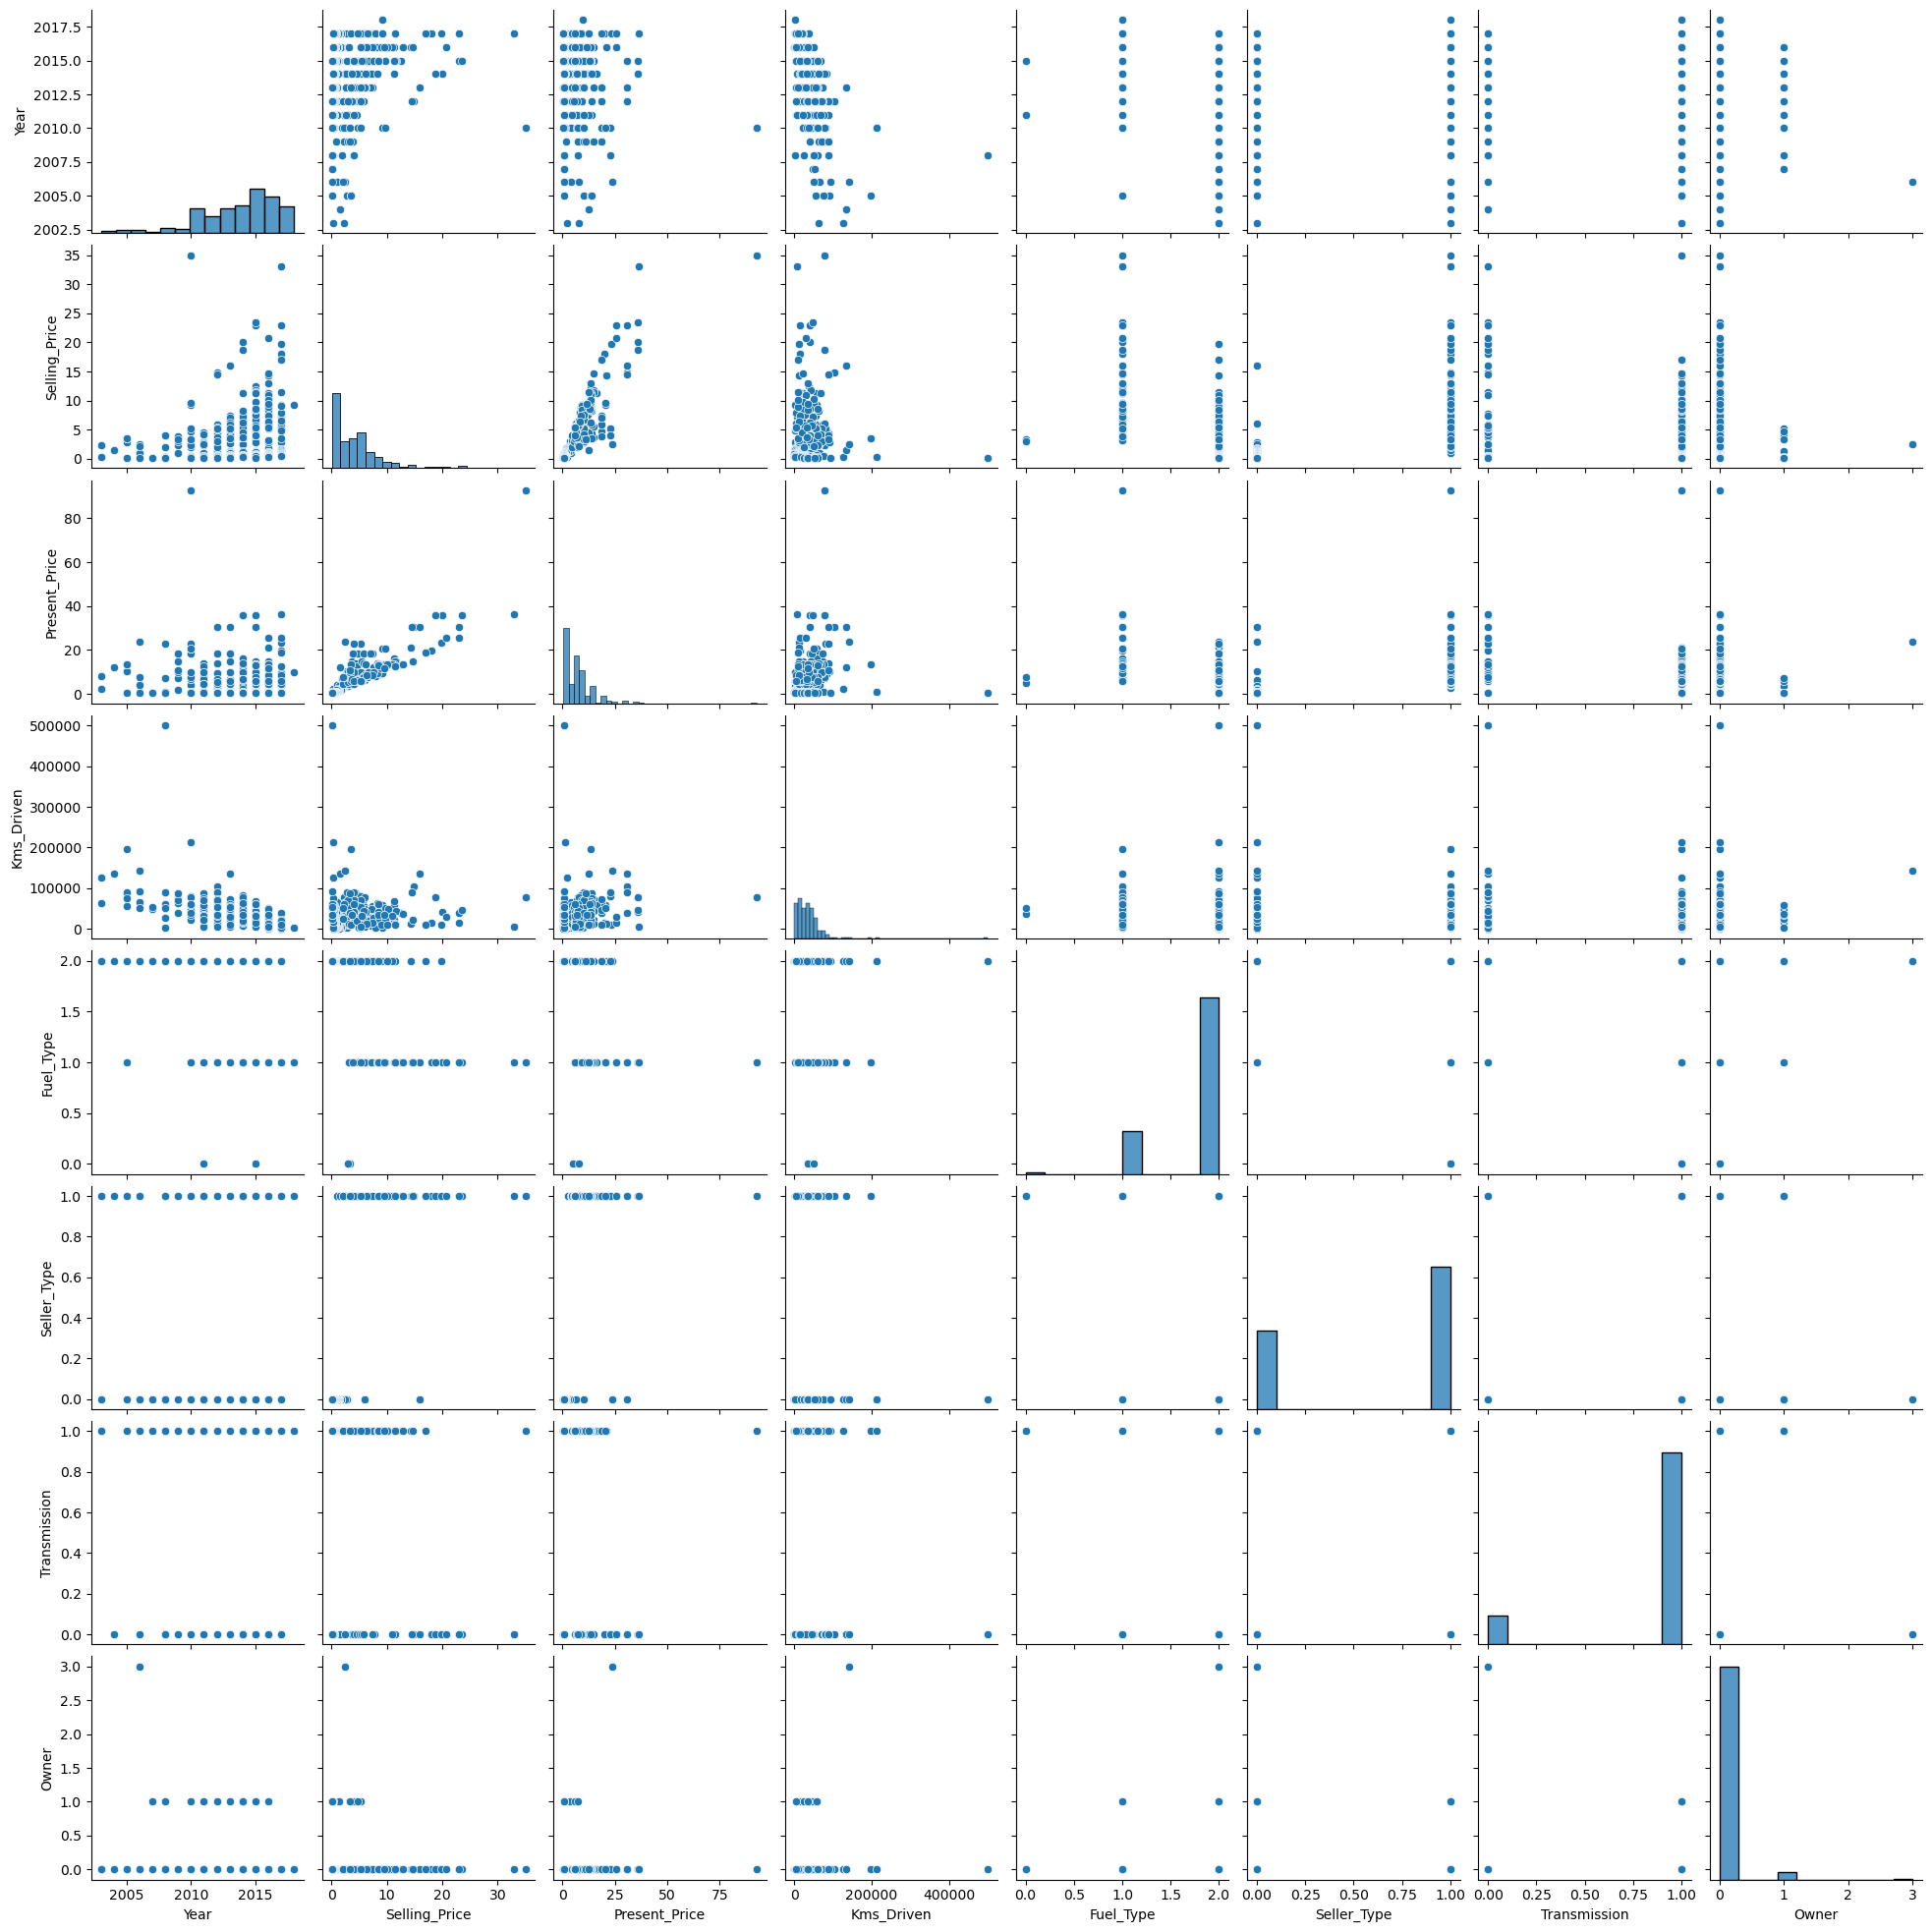

In [26]:
sns.pairplot(df)

## Feature selection

<Axes: >

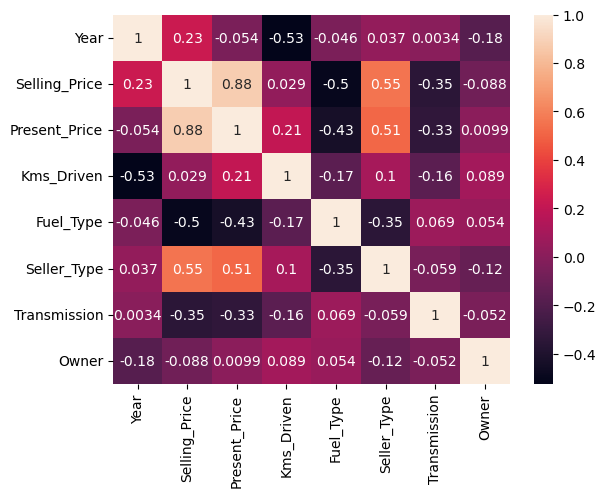

In [28]:
sns.heatmap(df.corr(),annot=True)

In [29]:
df = df.drop('Owner',axis=1)

In [30]:
#creating dependent and independent variables
X = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']

In [31]:
#importing some useful sklearn libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [32]:
#splitting into trainng and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [33]:
#scaling the variables to a specific range
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Hyperparameter tuning

In [36]:
param_grid = {
    'n_estimators':[10,30,50,60],
    'max_depth':[10,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
grid = GridSearchCV(estimator = RandomForestRegressor(),param_grid=param_grid,cv=5,return_train_score=False)

In [37]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 30, 50, 60]})

In [38]:
print(f'Best Parameters: {grid.best_params_}')

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 30}


## Model building

In [41]:
model = RandomForestRegressor(max_depth=10,min_samples_leaf= 2,min_samples_split=2, n_estimators=30)

In [42]:
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=30)

In [43]:
pred = model.predict(X_test)

In [47]:
print(mean_absolute_error(y_test,pred))

0.6670634082892417


In [48]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9169961844077748


## Model saving

In [49]:
import pickle
pickle.dump(model,open('car.pkl','wb'))